In [14]:
import pandas as pd
import pymysql

connection = pymysql.connect(
    host='localhost',
    user='root',  
    password='rootroot', 
    database='shopping_trends'
)

query = 'SELECT * FROM shopping_trends'
df = pd.read_sql(query, connection)

connection.close()

/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_61519/1315646374.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [15]:
import pandas as pd  # Importa pandas per la manipolazione e l'analisi dei dati
import matplotlib.pyplot as plt  # Importa matplotlib per la visualizzazione dei dati
import seaborn as sns  # Importa seaborn per visualizzare e analizzare i dati in modo più elegante
from sklearn.model_selection import train_test_split  # Importa train_test_split per dividere i dati in set di addestramento e test
from sklearn.linear_model import LinearRegression  # Importa LinearRegression per creare modelli di regressione
from sklearn.cluster import KMeans  # Importa KMeans per eseguire clustering
from sklearn.metrics import mean_squared_error, r2_score  # Importa metriche di valutazione per modelli

In [16]:
# Visualizzare le prime righe
print(df.head())

# Informazioni sui dati
print(df.info())

# Statistiche descrittive
print(df.describe())

   customer_id  age gender item_purchased  category  purchase_amount_usd  \
0            1   55   Male         Blouse  Clothing                   53   
1            2   19   Male        Sweater  Clothing                   64   
2            3   50   Male          Jeans  Clothing                   73   
3            4   21   Male        Sandals  Footwear                   90   
4            5   45   Male         Blouse  Clothing                   49   

        location size      color  season  review_rating subscription_status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  payment_method  shipping_type discount_applied promo_code_used  \


<Figure size 1200x600 with 0 Axes>

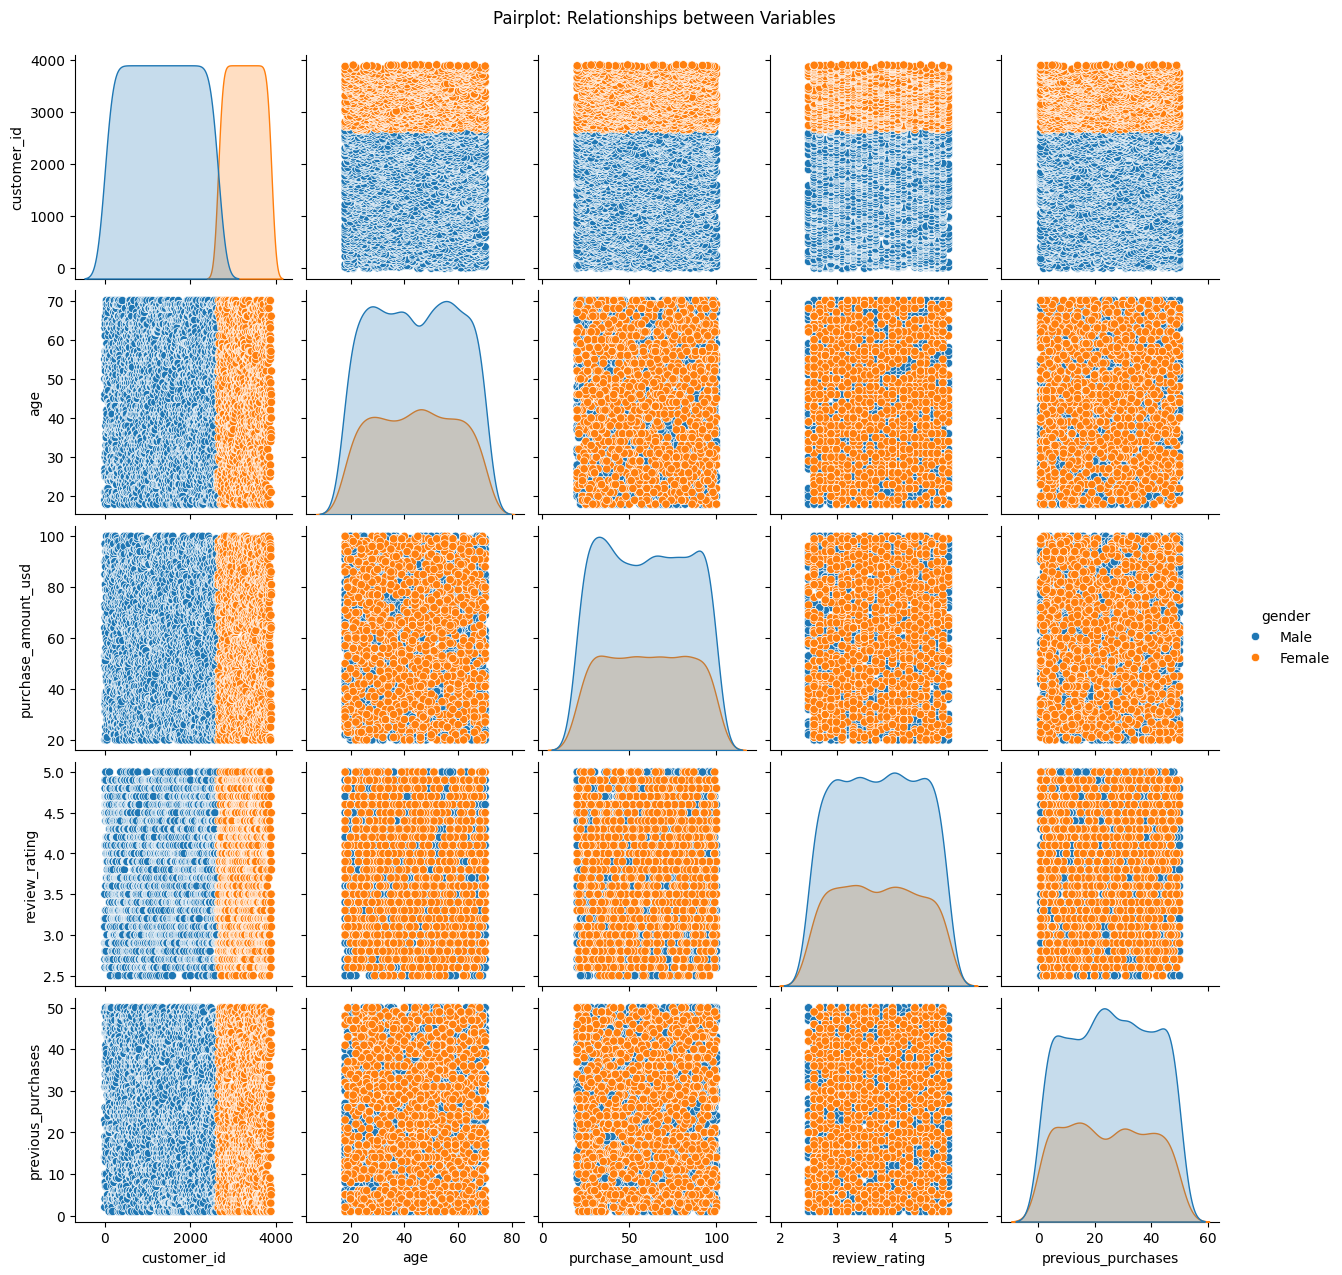

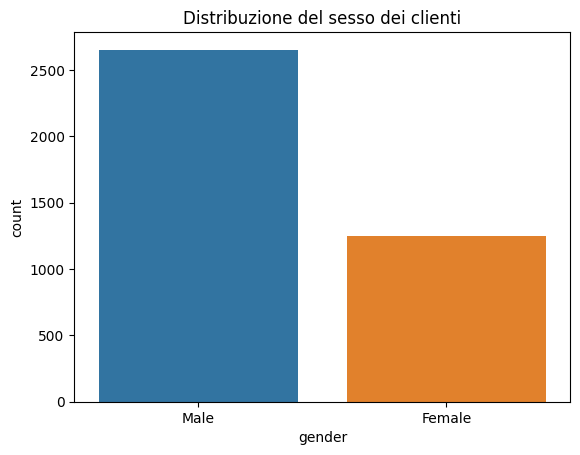

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Età
plt.figure(figsize=(12, 6))
sns.pairplot(df, hue='gender', diag_kind='kde')
plt.suptitle('Pairplot: Relationships between Variables', y=1.02)
plt.show()

# Sesso
sns.countplot(data=df, x='gender', hue='gender')
plt.title('Distribuzione del sesso dei clienti')
plt.show()


/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_61519/1248347473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc_counts.index, y=loc_counts.values, palette='viridis')


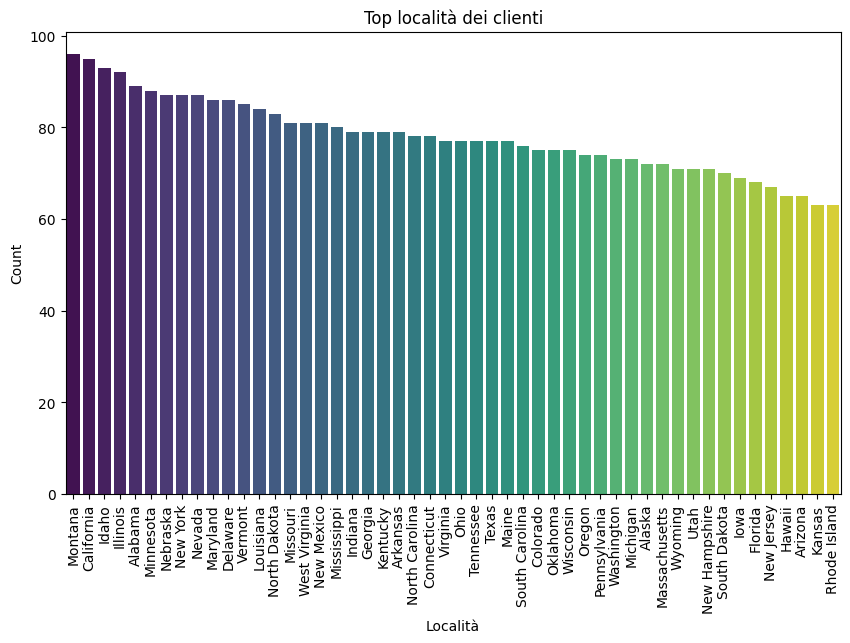

In [18]:
loc_counts = df['location'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=loc_counts.index, y=loc_counts.values, palette='viridis')
plt.title('Top località dei clienti')
plt.xlabel('Località')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Ruota le etichette dell'asse x se necessario
plt.show()


/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_61519/1829894380.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='viridis')


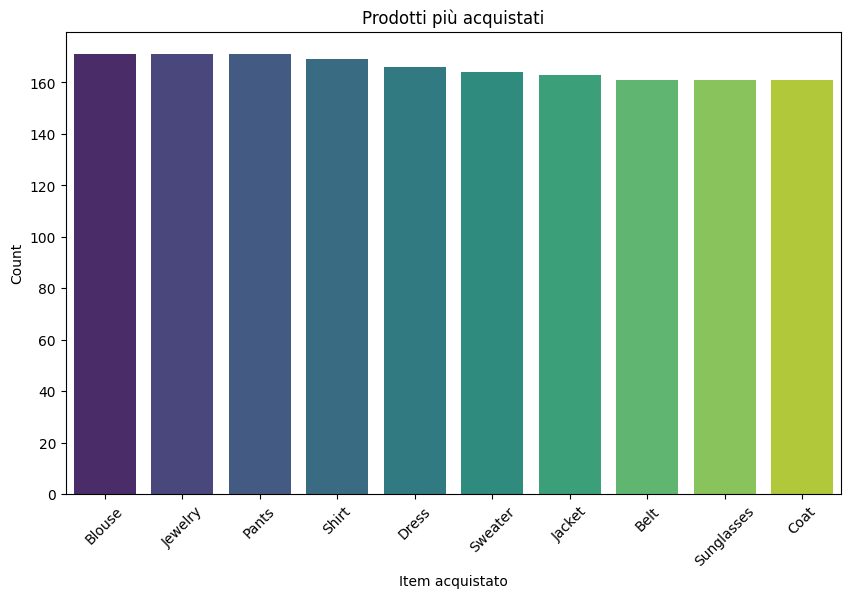

In [19]:
# Calcolo dei prodotti più popolari
item_counts = df['item_purchased'].value_counts().head(10)

# Visualizza i top 10 prodotti
plt.figure(figsize=(10,6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette='viridis')
plt.title('Prodotti più acquistati')
plt.xlabel('Item acquistato')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_61519/3954407691.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


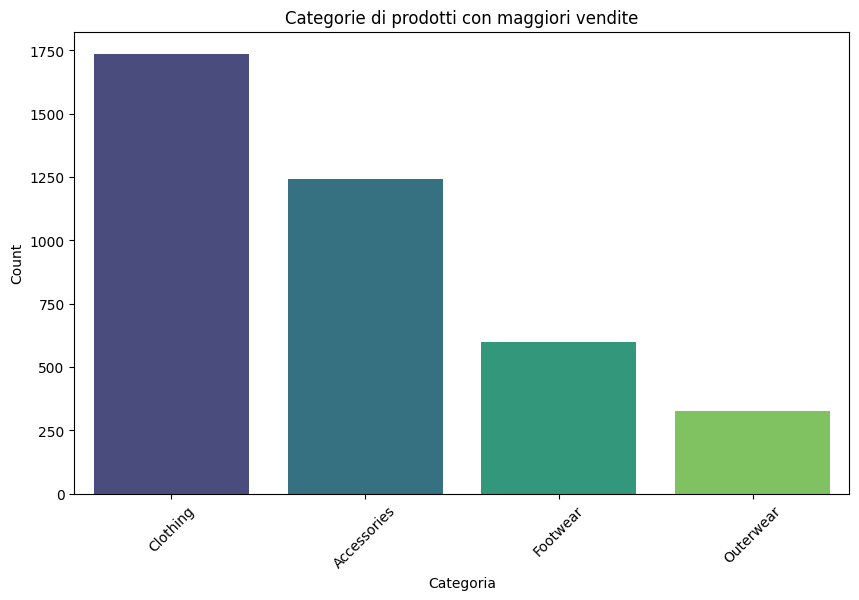

In [20]:
# Calcolo delle vendite per ciascuna categoria
category_counts = df['category'].value_counts().head(10)

# Visualizza le top 10 categorie
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Categorie di prodotti con maggiori vendite')
plt.xlabel('Categoria')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_61519/1579990267.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=df, palette='viridis')


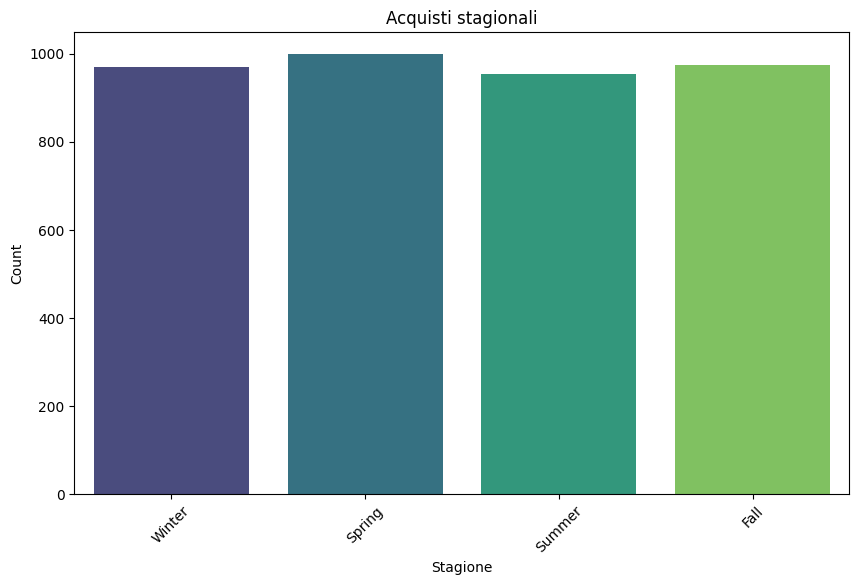

In [21]:
# Conto degli acquisti per stagione
season_counts = df['season'].value_counts()

# Visualizza la distribuzione degli acquisti per stagione
plt.figure(figsize=(10,6))
sns.countplot(x='season', data=df, palette='viridis')
plt.title('Acquisti stagionali')
plt.xlabel('Stagione')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_61519/3559151277.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['purchase_amount_usd'], kde=True, bins=20, palette='viridis')


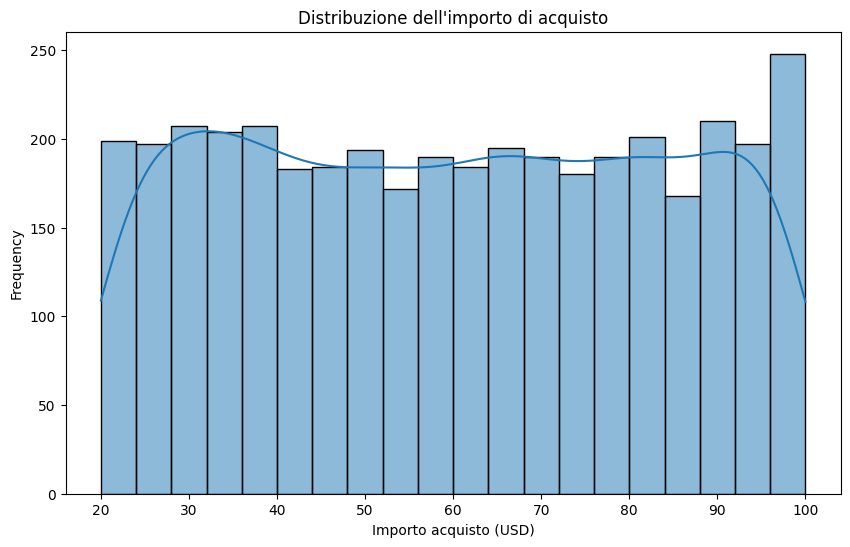

Media: 59.76 USD, Deviazione Standard: 23.69 USD


In [22]:
# Istogramma dell'importo di acquisto
plt.figure(figsize=(10,6))
sns.histplot(df['purchase_amount_usd'], kde=True, bins=20, palette='viridis')
plt.title('Distribuzione dell\'importo di acquisto')
plt.xlabel('Importo acquisto (USD)')
plt.ylabel('Frequency')
plt.show()

# Calcolo della media e deviazione standard
mean_purchase = df['purchase_amount_usd'].mean()
std_purchase = df['purchase_amount_usd'].std()
print(f"Media: {mean_purchase:.2f} USD, Deviazione Standard: {std_purchase:.2f} USD")


ValueError: List of boxplot statistics and `positions` values must have same the length

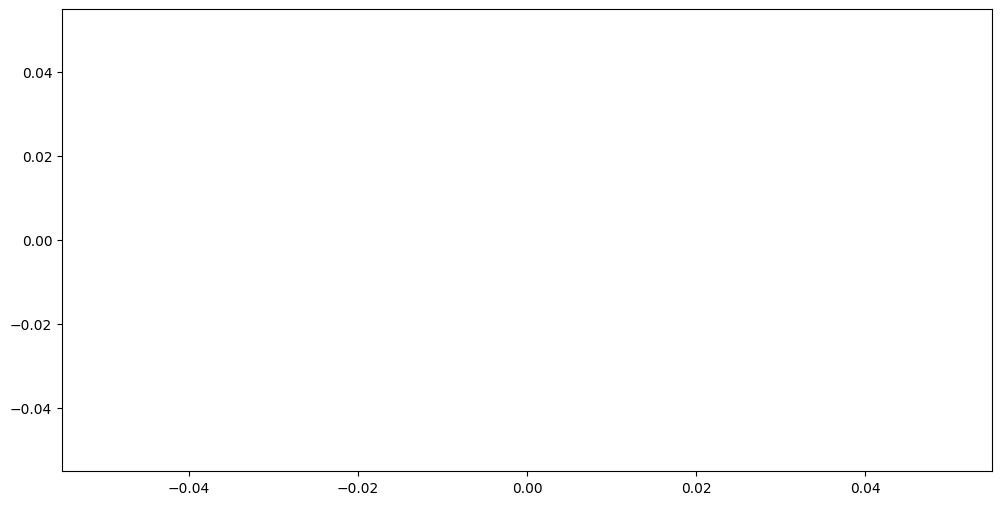

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Mappare "yes" e "no" a 1 e 0 per calcolare l'effetto dello sconto promozionale
df['discount_effect'] = df['promo_code_used'].map({'yes': 1, 'no': 0})

# Calcolo della media del revenue per acquisti con e senza promozione
revenue_with_promo = df[df['discount_effect'] == 1]['purchase_amount_usd']
revenue_without_promo = df[df['discount_effect'] == 0]['purchase_amount_usd']

# Visualizzazione dei dati
plt.figure(figsize=(12, 6))
sns.boxplot(x='discount_effect', y='purchase_amount_usd', data=df)
plt.title('Effetto dei codici promozionali sull\'importo di acquisto')
plt.xlabel('Uso del codice promozionale (1 = yes, 0 = no)')
plt.ylabel('Importo di acquisto (USD)')
plt.show()

# Test T-test per verificare la significatività
t_stat, p_value = ttest_ind(revenue_with_promo, revenue_without_promo, equal_var=False)  # Uso di `equal_var=False` per maggiore robustezza
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.5f}")

if p_value < 0.05:
    print("L'effetto dello sconto promozionale è statisticamente significativo.")
else:
    print("L'effetto dello sconto promozionale non è statisticamente significativo.")

# Correlazione tra uso del codice promozionale e importo speso
correlation = df[['discount_effect', 'purchase_amount_usd']].dropna()
correlation_value = correlation.corr().iloc[0, 1]
print(f"Correlazione tra uso del codice promozionale e importo speso: {correlation_value:.2f}")


In [26]:
import pandas as pd

# Carico i dati dal dataframe 'df'
# Assume 'df' è il dataframe che contiene i tuoi dati

# Serie per l'uso del codice promozionale e per gli importi di acquisto
promo_used = df['promo_code_used']
purchase_amount = df['purchase_amount_usd']

# Creazione di due serie distinte per clienti con e senza codice promozionale
promo_customers = purchase_amount[promo_used]
non_promo_customers = purchase_amount[~promo_used]

# Calcolo della correlazione di Pearson
correlation_with_promo = promo_customers.corr(non_promo_customers)
print(f"Correlazione con promo: {correlation_with_promo:.2f}")


KeyError: "None of [Index(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',\n       ...\n       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],\n      dtype='object', length=3900)] are in the [index]"

In [73]:
from scipy.stats import ttest_ind, sem

# Calculating the SEM (Standard Error of the Mean) for each group
sem_with_promo = sem(revenue_with_promo)
sem_without_promo = sem(revenue_without_promo)

# Calculating the confidence intervals
ci_with_promo = ttest_ind(revenue_with_promo, revenue_without_promo, equal_var=False)[1]
ci_without_promo = ttest_ind(revenue_with_promo, revenue_without_promo, equal_var=False)[1]

print(f"Confidence Interval with promotion: {ci_with_promo:.3f}")
print(f"Confidence Interval without promotion: {ci_without_promo:.3f}")


Confidence Interval with promotion: nan
Confidence Interval without promotion: nan


/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_24911/143020609.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  sem_without_promo = sem(revenue_without_promo)
/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_24911/143020609.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ci_with_promo = ttest_ind(revenue_with_promo, revenue_without_promo, equal_var=False)[1]
/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_24911/143020609.py:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ci_without_promo = ttest_ind(revenue_with_promo, revenue_without_promo, equal_var=False)[1]


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_encoded.drop(['purchase_amount_usd'], axis=1)
y = df_encoded['purchase_amount_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 1.0313892639722637
R^2: -0.033732981342326385


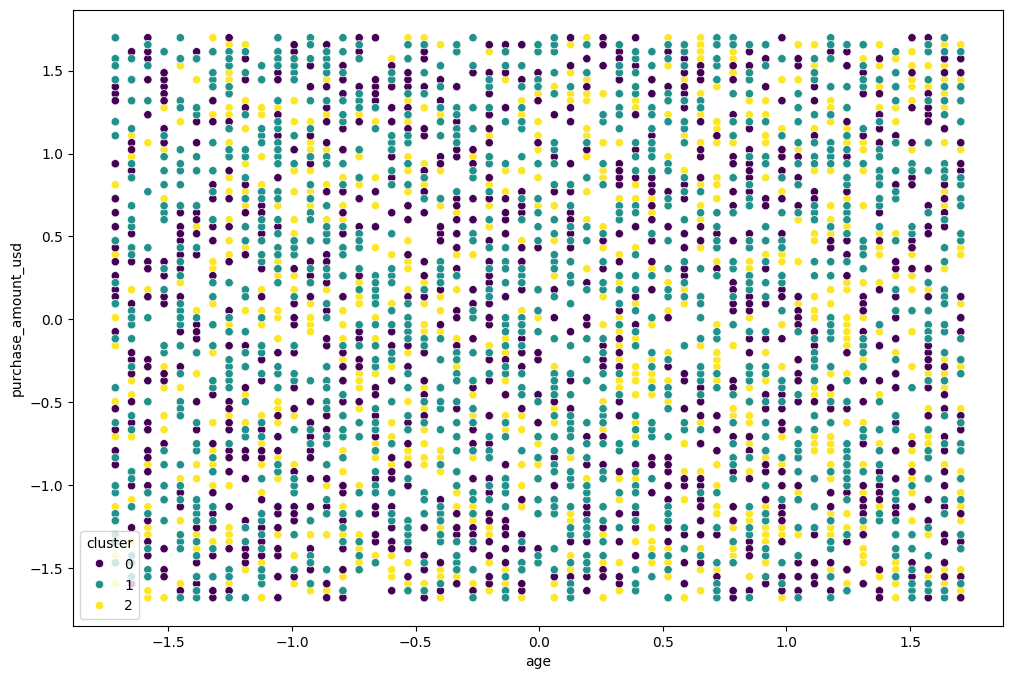

In [20]:
from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(df_encoded.drop(['purchase_amount_usd'], axis=1))

# Visualizzazione dei cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_encoded, x='age', y='purchase_amount_usd', hue='cluster', palette='viridis')
plt.show()